In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")
import matplotlib
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt

In [2]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [3]:
df_2013 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2013.csv')
df_2014 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2014.csv')
df_2015 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2015.csv')
df_2016 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2016.csv')
df_2017 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2017.csv')
df_2018 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2018.csv')
df_2019 = pd.read_csv('/Users/kylebaranko/Final_Project/csvs/nyiso_load_2019.csv')

In [4]:
def format_datetime(row):
    datetime_string = row['timestamp']
    year = datetime_string[:4]
    month = datetime_string[5:7]
    day = datetime_string[8:10]
    hour = datetime_string[11:13]
    datetime = "{}-{}-{} {}:00".format(year, month, day, hour)
    row['timestamp'] = datetime
    return row

def just_date(row):
    date = row['Date']
    date = str(date)
    date = date[:11]
    row['Date'] = date
    return row 

def get_season_peak_days(row):
    row['peak_day'] = 0
    peak = 0 
    date_time = row['Date']
    date_time = str(date_time)
    date = date_time[:10]
    if date in peak_days:
        peak = 1
    elif date not in peak_days:
        peak = 0
    row['peak_day'] = peak
    return row 

def peaky_finder(df):
    #df = df.apply(format_datetime, axis=1)
    df.timestamp = pd.to_datetime(df.timestamp, format='%Y/%m/%d %H:%M')
    df['Date'] = df['timestamp']
    df = df.set_index('timestamp')
    df = df.apply(just_date, axis=1)
    df_daily = df.resample('D').max()
    peak_days_df = df_daily.sort_values(by='load_MW', ascending=False).head(3)
    peak_days_df['Date'] = peak_days_df.index
    peak_days_df = peak_days_df.reset_index()
    peaks = peak_days_df['Date'].tolist()
    peak_days = []
    for date in peaks:
        date = str(date)
        date = date[:10]
        peak_days.append(date)
    return peak_days 

In [5]:
df_2013 = df_2013.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2013)
df_2013 = df_2013.apply(get_season_peak_days, axis=1)
df_2014 = df_2014.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2014)
df_2014 = df_2014.apply(get_season_peak_days, axis=1)
df_2015 = df_2015.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2015)
df_2015 = df_2015.apply(get_season_peak_days, axis=1)
df_2016 = df_2016.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2016)
df_2016 = df_2016.apply(get_season_peak_days, axis=1)
df_2017 = df_2017.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2017)
df_2017 = df_2017.apply(get_season_peak_days, axis=1)
df_2018 = df_2018.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2018)
df_2018 = df_2018.apply(get_season_peak_days, axis=1)
df_2019 = df_2019.apply(format_datetime, axis=1)
peak_days = peaky_finder(df_2019)
df_2019 = df_2019.apply(get_season_peak_days, axis=1)

In [6]:
df_2013.head()

,timestamp,load_MW,temperature,humidity,cloudcover,uvindex,hour_of_day,day_of_week,holiday,Date,peak_day
0,2013-06-14 23:00:00,15309.3,62.87,0.79,0.17,0,23,Friday,False,2013-06-14 23:00:00,0
1,2013-06-15 00:00:00,15192.6,62.78,0.80,0.00,0,0,Saturday,False,2013-06-15 00:00:00,0
2,2013-06-15 01:00:00,14247.2,62.66,0.80,0.00,0,1,Saturday,False,2013-06-15 01:00:00,0
3,2013-06-15 02:00:00,13628.3,62.50,0.80,0.00,0,2,Saturday,False,2013-06-15 02:00:00,0
4,2013-06-15 03:00:00,13290.8,62.64,0.79,0.00,0,3,Saturday,False,2013-06-15 03:00:00,0


In [7]:
df_2013.timestamp = pd.to_datetime(df_2013.timestamp, format='%Y/%m/%d %H:%M')
df_2013 = df_2013.set_index('timestamp')
df_daily_2013 = df_2013.resample('D').max()
df_2014.timestamp = pd.to_datetime(df_2014.timestamp, format='%Y/%m/%d %H:%M')
df_2014 = df_2014.set_index('timestamp')
df_daily_2014 = df_2014.resample('D').max()
df_2015.timestamp = pd.to_datetime(df_2015.timestamp, format='%Y/%m/%d %H:%M')
df_2015 = df_2015.set_index('timestamp')
df_daily_2015 = df_2015.resample('D').max()
df_2016.timestamp = pd.to_datetime(df_2016.timestamp, format='%Y/%m/%d %H:%M')
df_2016 = df_2016.set_index('timestamp')
df_daily_2016 = df_2016.resample('D').max()
df_2017.timestamp = pd.to_datetime(df_2017.timestamp, format='%Y/%m/%d %H:%M')
df_2017 = df_2017.set_index('timestamp')
df_daily_2017 = df_2017.resample('D').max()
df_2018.timestamp = pd.to_datetime(df_2018.timestamp, format='%Y/%m/%d %H:%M')
df_2018 = df_2018.set_index('timestamp')
df_daily_2018 = df_2018.resample('D').max()
df_2019.timestamp = pd.to_datetime(df_2019.timestamp, format='%Y/%m/%d %H:%M')
df_2019 = df_2019.set_index('timestamp')
df_daily_2019 = df_2019.resample('D').max()

In [8]:
df_daily_2013

,load_MW,temperature,humidity,cloudcover,uvindex,hour_of_day,day_of_week,holiday,Date,peak_day
timestamp,,,,,,,,,,
2013-06-14,15309.3,62.87,0.79,0.17,0,23,Friday,False,2013-06-14 23:00:00,0
2013-06-15,19032.4,80.19,0.81,0.52,9,23,Saturday,False,2013-06-15 23:00:00,0
2013-06-16,19651.1,81.43,0.79,0.85,8,23,Sunday,False,2013-06-16 23:00:00,0
2013-06-17,24869.2,85.02,0.88,0.62,8,23,Monday,False,2013-06-17 23:00:00,0
2013-06-18,24071.3,82.18,0.91,1.00,8,23,Tuesday,False,2013-06-18 23:00:00,0
...,...,...,...,...,...,...,...,...,...,...
2013-09-10,26152.0,84.92,0.85,1.00,5,23,Tuesday,False,2013-09-10 23:00:00,0
2013-09-11,31307.1,93.41,0.90,0.57,7,23,Wednesday,False,2013-09-11 23:00:00,0
2013-09-12,26904.0,83.94,0.92,1.00,5,23,Thursday,False,2013-09-12 23:00:00,0


In [9]:
def prep_V5(df):
    df['load (t-1)'] = df.load_MW.shift(1)
    df['first difference'] = df.load_MW.shift(1) - df.load_MW.shift(2) 
    #df['temp (t-24)'] = df.temperature.shift(24) 
    df = df.dropna(axis = 0, how ='any')
    return df 

In [10]:
df_daily_2013 = prep_V5(df_daily_2013)
df_daily_2014 = prep_V5(df_daily_2014)
df_daily_2015 = prep_V5(df_daily_2015)
df_daily_2016 = prep_V5(df_daily_2016)
df_daily_2017 = prep_V5(df_daily_2017)
df_daily_2018 = prep_V5(df_daily_2018 )
df_daily_2019 = prep_V5(df_daily_2019)

In [11]:
total = [df_daily_2013, df_daily_2014, df_daily_2015, df_daily_2016, df_daily_2017, df_daily_2018, df_daily_2019]
master_df = pd.concat(total)

In [12]:
master_df.head()

,load_MW,temperature,humidity,cloudcover,uvindex,hour_of_day,day_of_week,holiday,Date,peak_day,load (t-1),first difference
timestamp,,,,,,,,,,,,
2013-06-16,19651.1,81.43,0.79,0.85,8,23,Sunday,False,2013-06-16 23:00:00,0,19032.4,3723.1
2013-06-17,24869.2,85.02,0.88,0.62,8,23,Monday,False,2013-06-17 23:00:00,0,19651.1,618.7
2013-06-18,24071.3,82.18,0.91,1.00,8,23,Tuesday,False,2013-06-18 23:00:00,0,24869.2,5218.1
2013-06-19,21795.2,75.95,0.91,1.00,9,23,Wednesday,False,2013-06-19 23:00:00,0,24071.3,-797.9
2013-06-20,22664.5,78.49,0.82,0.39,10,23,Thursday,False,2013-06-20 23:00:00,0,21795.2,-2276.1


In [13]:
master_df = master_df.drop('Date', 1)


In [14]:
master_df = master_df.drop('hour_of_day', 1)


In [15]:
master_df = master_df.drop('load_MW', 1)

## Run model 

In [16]:
master_df.head()

,temperature,humidity,cloudcover,uvindex,day_of_week,holiday,peak_day,load (t-1),first difference
timestamp,,,,,,,,,
2013-06-16,81.43,0.79,0.85,8,Sunday,False,0,19032.4,3723.1
2013-06-17,85.02,0.88,0.62,8,Monday,False,0,19651.1,618.7
2013-06-18,82.18,0.91,1.00,8,Tuesday,False,0,24869.2,5218.1
2013-06-19,75.95,0.91,1.00,9,Wednesday,False,0,24071.3,-797.9
2013-06-20,78.49,0.82,0.39,10,Thursday,False,0,21795.2,-2276.1


In [17]:
master_df[master_df['temperature'] == 0] = np.NaN
master_df[master_df['humidity'] == 0] = np.NaN
master_df = master_df.fillna(method='ffill')

In [18]:
model_df = master_df.copy()
day_dummies = pd.get_dummies(model_df['day_of_week'], prefix='day', drop_first=True)
holiday_dummies = pd.get_dummies(model_df['holiday'], prefix='holiday', drop_first=True)
model_df = model_df.drop(['day_of_week', 'holiday'], axis=1)
model_df = pd.concat([model_df, day_dummies, holiday_dummies], axis=1)

In [19]:
model_df = model_df.dropna(axis = 0, how ='any')

In [20]:
training_df = model_df[['temperature', 'day_Saturday', 'day_Sunday', 'holiday_1.0', 'peak_day', 'load (t-1)']]

In [21]:
training_df.head()

,temperature,day_Saturday,day_Sunday,holiday_1.0,peak_day,load (t-1)
timestamp,,,,,,
2013-06-16,81.43,0,1,0,0.0,19032.4
2013-06-17,85.02,0,0,0,0.0,19651.1
2013-06-18,82.18,0,0,0,0.0,24869.2
2013-06-19,75.95,0,0,0,0.0,24071.3
2013-06-20,78.49,0,0,0,0.0,21795.2


In [22]:
training_df.to_csv('log_train.csv')

In [23]:
model_df['temperature'] = (model_df['temperature'] - np.mean(model_df['temperature'])) / np.sqrt(np.var(model_df['temperature']))
model_df['load (t-1)'] = (model_df['load (t-1)'] - np.mean(model_df['load (t-1)'])) / np.sqrt(np.var(model_df['load (t-1)']))
model_df['first difference'] = (model_df['first difference'] - np.mean(model_df['first difference'])) / np.sqrt(np.var(model_df['first difference']))


In [24]:
master_df['peak_day'].value_counts()

0.0    616
1.0     21
Name: peak_day, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
X = model_df.loc[:, model_df.columns != 'peak_day']
y = model_df.loc[:, model_df.columns == 'peak_day']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of peak days in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of non-peak days",len(os_data_y[os_data_y['y']==1]))
print("Proportion of peak days data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of non-peak days data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  860
Number of peak days in oversampled data 430
Number of non-peak days 430
Proportion of peak days data in oversampled data is  0.5
Proportion of non-peak days data in oversampled data is  0.5


In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.053353
         Iterations: 35
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.638     
Dependent Variable:       peak_day               AIC:                    73.4838   
Date:                     2019-12-04 20:36       BIC:                    126.7587  
No. Observations:         445                    Log-Likelihood:         -23.742   
Df Model:                 12                     LL-Null:                -65.595   
Df Residuals:             432                    LLR p-value:            8.0678e-13
Converged:                0.0000                 Scale:                  1.0000    
No. Iterations:           35.0000                                                  
-----------------------------------------------------------------------------------
                  Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------

In [29]:
model_df = model_df[['temperature', 'day_Saturday', 'day_Sunday', 'holiday_1.0', 'peak_day', 'load (t-1)']]

In [30]:
X = model_df.loc[:, model_df.columns != 'peak_day']
y = model_df.loc[:, model_df.columns == 'peak_day']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of peak days in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of non-peak days",len(os_data_y[os_data_y['y']==1]))
print("Proportion of peak days data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of non-peak days data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  860
Number of peak days in oversampled data 430
Number of non-peak days 430
Proportion of peak days data in oversampled data is  0.5
Proportion of non-peak days data in oversampled data is  0.5


In [37]:
logit_model=sm.Logit(y_train,X_train, i = 0.1)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.502540
         Iterations: 35
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    -2.409  
Dependent Variable:    peak_day            AIC:                 457.2603
Date:                  2019-12-04 20:37    BIC:                 477.7507
No. Observations:      445                 Log-Likelihood:      -223.63 
Df Model:              4                   LL-Null:             -65.595 
Df Residuals:          440                 LLR p-value:         1.0000  
Converged:             0.0000              Scale:               1.0000  
No. Iterations:        35.0000                                          
------------------------------------------------------------------------
              Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
------------------------------------------------------------------------
temperature    0.3791     0.1496  2.5342 0.0113       0.0859      0.6724
day_Saturday  

Run with sklearn 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [41]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
THRESHOLD = 0.25
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.755208
recall,1.000000
precision,0.113208
roc_auc_score,0.873656


In [42]:
preds

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [51]:
X_train['2015-07-29']

,temperature,day_Saturday,day_Sunday,holiday_1.0,load (t-1)
timestamp,,,,,
2015-07-29,1.784225,0,0,0,1.760244


In [50]:
y_train.head(50)

,peak_day
timestamp,
2013-06-16,0.0
2017-07-26,0.0
2013-08-26,0.0
2015-09-05,0.0
2014-06-27,0.0
2017-08-26,0.0
2014-07-03,0.0
2016-08-24,0.0
2015-07-09,0.0


In [37]:
import pickle
# Save
file_name = 'log_reg_model.pkl'
pickle.dump(clf, open(file_name, "wb")) 

In [38]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)

In [39]:
coefficients.columns = ['Coefficient', 'Value']

In [40]:
coefficients

,Coefficient,Value
0,temperature,2.883978
1,day_Saturday,-1.326981
2,day_Sunday,-1.291990
3,holiday_1.0,-0.740864
4,load (t-1),0.759935


In [41]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.765625
[[141  45]
 [  0   6]]

******** For i = 0.1 ******
Our testing accuracy is 0.9010416666666666
[[167  19]
 [  0   6]]

******** For i = 0.15 ******
Our testing accuracy is 0.9322916666666666
[[174  12]
 [  1   5]]

******** For i = 0.2 ******
Our testing accuracy is 0.9583333333333334
[[180   6]
 [  2   4]]

******** For i = 0.25 ******
Our testing accuracy is 0.9739583333333334
[[183   3]
 [  2   4]]

******** For i = 0.3 ******
Our testing accuracy is 0.9791666666666666
[[185   1]
 [  3   3]]

******** For i = 0.35 ******
Our testing accuracy is 0.9791666666666666
[[185   1]
 [  3   3]]

******** For i = 0.4 ******
Our testing accuracy is 0.984375
[[186   0]
 [  3   3]]

******** For i = 0.45 ******
Our testing accuracy is 0.9791666666666666
[[186   0]
 [  4   2]]

******** For i = 0.5 ******
Our testing accuracy is 0.9739583333333334
[[186   0]
 [  5   1]]

******** For i = 0.55 ******
Our testing accuracy is 0.96875
[[1

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
classes = ['Non-Peak', 'Peak']

Confusion Matrix, without normalization
[[139  47]
 [  0   6]]


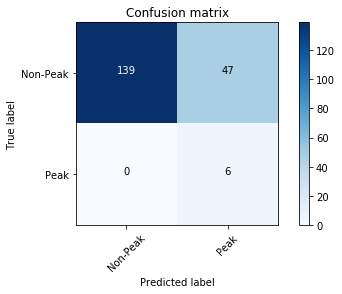

In [41]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [42]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
classes = ['Non-Peak', 'Peak']

Confusion Matrix, without normalization
[[139  47]
 [  0   6]]


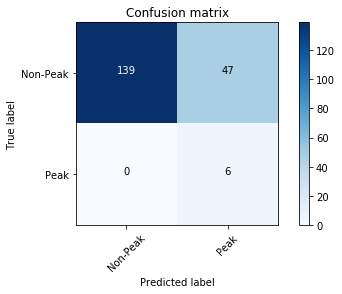

In [43]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)